# <font color=blue> 演算法 Pocket PLA 練習

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# set data points
dataset = np.array( [((1, -0.4, 0.3), -1),
                    ((1, -0.3, -0.1), -1),
                    ((1, -0.2, 0.4), -1),
                    ((1, -0.1, 0.1), -1),
                    ((1, 0.9, -0.5), 1),
                    ((1, 0.7, -0.9), 1),
                    ((1, 0.8, 0.2), 1),
                    ((1, 0.4, -0.6), 1),
                    ((1, 0.2, 0.6), -1),
                    ((1, -0.5, -0.5), -1),
                    ((1, 0.7, 0.3), 1),
                    ((1, 0.9, -0.6), 1),
                    ((1, -0.1, 0.2), -1),
                    ((1, 0.3, -0.6), 1),
                    ((1, 0.5, 0.1), -1)])

<ipython-input-32-c28570cf1afe>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataset = np.array( [((1, -0.4, 0.3), -1),


In [299]:
# pla演算法
maxiteration = 500
def Pocket_PLA(dataset,maxiteration):
    def check(w):   # 檢查哪裡有錯誤點
        error = 0
        error_set = []
        for x,y in dataset:
            if np.sign(np.dot(w.T,x)) != y: # w.T is transpose for matrix works, np.dot is inner product
                error += 1
                error_set.append([x,y])
        return error, error_set

    w=np.zeros(len(dataset[0,0])) # 3, coefficient for x,y,interpret
    wf= w.copy()
    last_error_time= len(dataset) # 15
    iteratoion=0
    mistake_point=[]
    w_history = []
    for i in range(maxiteration):
        error,error_set = check(w)
        if error_set != []:
            xt, yt = error_set[np.random.choice(range(error))]
            error,error_set= check(w)
            mistake_point.append([xt,yt])        # 修正參照的xt,yt
            w_history.append(w.copy())           # 修正前的 w
            w += yt*np.array(xt)
            
        if error < last_error_time:
            iteratoion += 1
            wf = w.copy()                  
            last_error_time = error
    return wf,last_error_time,mistake_point,w_history


0


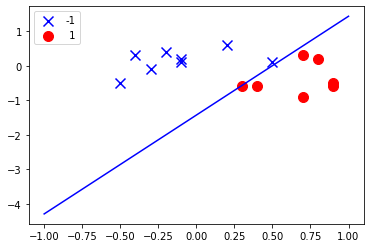

In [300]:
# w: 最後的 Discision boundary
# error_time: 最後判錯的點個數
# mistake_point: 修正的參照點
# w_history: 修正前的Discision boundary 法向量
w, error_time,mistake_point,w_history= Pocket_PLA(dataset,maxiteration)
print(error_time)
# plot
ps = [v[0] for v in dataset]
fig = plt.figure()
ax1 = fig.add_subplot(111)
xx = list(filter(lambda d: d[1] == -1, dataset)) # which data are xx
ax1.scatter([x[0][1] for x in xx], [x[0][2] for x in xx],
                   s=100, c='b', marker="x", label='-1')  # s:size, c:color
oo = list(filter(lambda d: d[1] ==  1, dataset)) # which data are oo
ax1.scatter([x[0][1] for x in oo], [x[0][2] for x in oo],
                   s=100, c="r", marker="o", label=" 1")
l = np.linspace(-1,1)
a,b = -w[1]/w[2], -w[0]/w[2]
ax1.plot(l, a*l + b, 'b-')
plt.legend(loc='upper left');
plt.show()

In [302]:
# plot
def plot_iteration(iteration):
    ps = [v[0] for v in dataset]
    ax1 = fig.add_subplot(5,4,iteration+1)
    xx = list(filter(lambda d: d[1] == -1, dataset)) # which data are xx
    ax1.scatter([x[0][1] for x in xx], [x[0][2] for x in xx],
                       s=100, c='b', marker="x", label='-1')  # s:size, c:color
    oo = list(filter(lambda d: d[1] ==  1, dataset)) # which data are oo
    ax1.scatter([x[0][1] for x in oo], [x[0][2] for x in oo],
                       s=100, c="r", marker="o", label=" 1")
    l = np.linspace(-2,2)
    # 最後一張圖
    if iteration== len(mistake_point):
        # wf
        a,b = -w[1]/w[2], -w[0]/w[2]
        ax1.plot(l, a*l + b, 'b-')
        # w_f法向量
        ax1.plot(w[1]*l, w[2]*l, 'r-')
    # 倒數第二張
    elif iteration== (len(mistake_point)-1):
        # wf
        l = np.linspace(-2,2)
        a,b = -w_history[iteration][1]/w_history[iteration][2], -w_history[iteration][0]/w_history[iteration][2]
        ax1.plot(l, a*l + b, 'b-')
        # w_f法向量
        ax1.plot(w_history[iteration][1]*l, w_history[iteration][2]*l, 'r-')
        # mistake_point
        x_vec = np.linspace(0,mistake_point[iteration][0][1])
        ax1.plot(x_vec, x_vec/mistake_point[iteration][0][1]*mistake_point[iteration][0][2], 'g-')
        # 修正後的wf
        a,b = -w[1]/w[2], -w[0]/w[2]
        ax1.plot(l, a*l + b, color='#000000' ,linestyle='-',lw=0.5)
        # w_f法向量
        ax1.plot(w[1]*l, w[2]*l, color='#A52A2A',linestyle="-",lw=0.5)
    # 中間的圖
    else:
        # wf
        a,b = -w_history[iteration][1]/w_history[iteration][2], -w_history[iteration][0]/w_history[iteration][2]
        ax1.plot(l, a*l + b, 'b-')
        # w_f法向量
        ax1.plot(w_history[iteration][1]*l, w_history[iteration][2]*l, 'r-')
        # mistake_point
        x_vec = np.linspace(0,mistake_point[iteration][0][1])
        ax1.plot(x_vec, x_vec/mistake_point[iteration][0][1]*mistake_point[iteration][0][2], 'g-')
        # 修正後的wf
        a,b = -w_history[iteration+1][1]/w_history[iteration+1][2], -w_history[iteration+1][0]/w_history[iteration+1][2]
        ax1.plot(l, a*l + b, color='#000000' ,linestyle='-',lw=0.5)
        # 修正後的w_f法向量
        ax1.plot(w_history[iteration+1][1]*l, w_history[iteration+1][2]*l, color='#A52A2A',linestyle="-",lw=0.5)

    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.legend(loc='upper left');

<ipython-input-302-1f2c5add4510>:38: RuntimeWarning: invalid value encountered in double_scalars
  a,b = -w_history[iteration][1]/w_history[iteration][2], -w_history[iteration][0]/w_history[iteration][2]


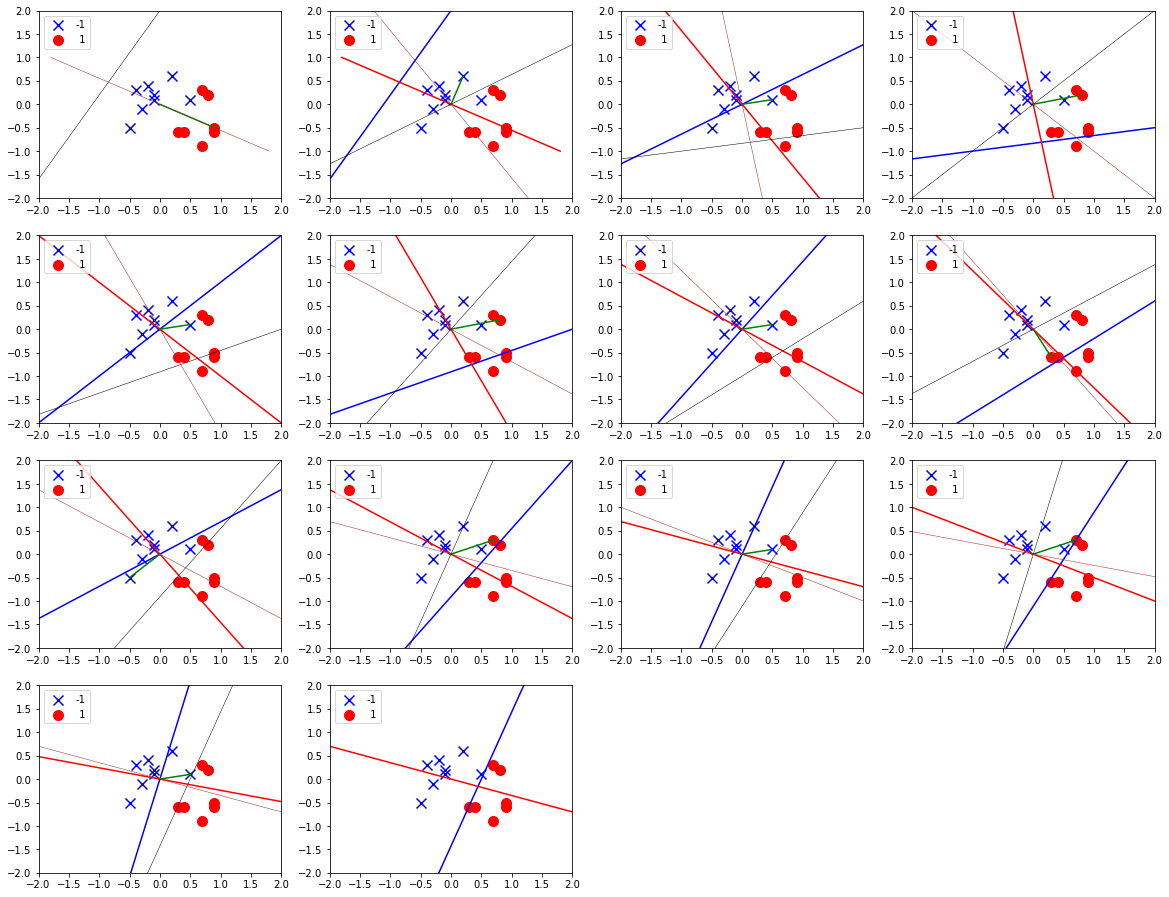

In [303]:
fig = plt.figure(figsize=(20,20))
for i in range(len(mistake_point)+1):
    plot_iteration(i)
plt.show()
# 綠線:此次參照的誤判點 xt,yt
# 紅線:Discision boundary 的法向量
# 藍線:Discision boundary 
# 黑線:修正後的 Discision boundary
# 棕色:修正後的 Discision boundary 的法向量